<a href="https://colab.research.google.com/github/saimaayub/DS-project/blob/main/EDA_daily_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Calling the data
file_path = '/content/drive/My Drive/LCL-June2015v2_0.csv'

df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   LCLid                    1000000 non-null  object
 1   stdorToU                 1000000 non-null  object
 2   DateTime                 1000000 non-null  object
 3   KWH/hh (per half hour)   1000000 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB
None


In [7]:
# Display summary statistics
print(df.describe())

            LCLid stdorToU                     DateTime  \
count     1000000  1000000                      1000000   
unique         30        1                        39102   
top     MAC000018      Std  2012-11-20 00:00:00.0000000   
freq        39082  1000000                           58   

       KWH/hh (per half hour)   
count                  1000000  
unique                    4801  
top                         0   
freq                     45538  


In [8]:
# Convert the DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [9]:
# Set the DateTime column as the index
#df.set_index('DateTime', inplace=True)

##Renaming KWH/hh (per half hour) column to avoid errors due to spaces in column name.

In [10]:
# Display the original DataFrame column names
print("Original columns:", df.columns)

# Rename the column using a name without spaces in it.
df.rename(columns={'KWH/hh (per half hour) ': 'KWH/hh'}, inplace=True)

# Display the DataFrame after renaming the column
print("\nColumns after renaming:", df.columns)

Original columns: Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '], dtype='object')

Columns after renaming: Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh'], dtype='object')


In [11]:
# Convert the renamed column to numeric
df['KWH/hh'] = pd.to_numeric(df['KWH/hh'], errors='coerce')

## Converting half hourly data to daily data.

In [12]:
# Group by day and calculate the mean of kWh/hh for each day
daily_data = df.groupby(df['DateTime'].dt.date)['KWH/hh'].mean().reset_index()

# Print the first few rows of daily_data for verification
print(daily_data.head())

     DateTime    KWH/hh
0  2011-12-06  0.133955
1  2011-12-07  0.290976
2  2011-12-08  0.272340
3  2011-12-09  0.237201
4  2011-12-10  0.269921


## Plotting the data using Histogram.

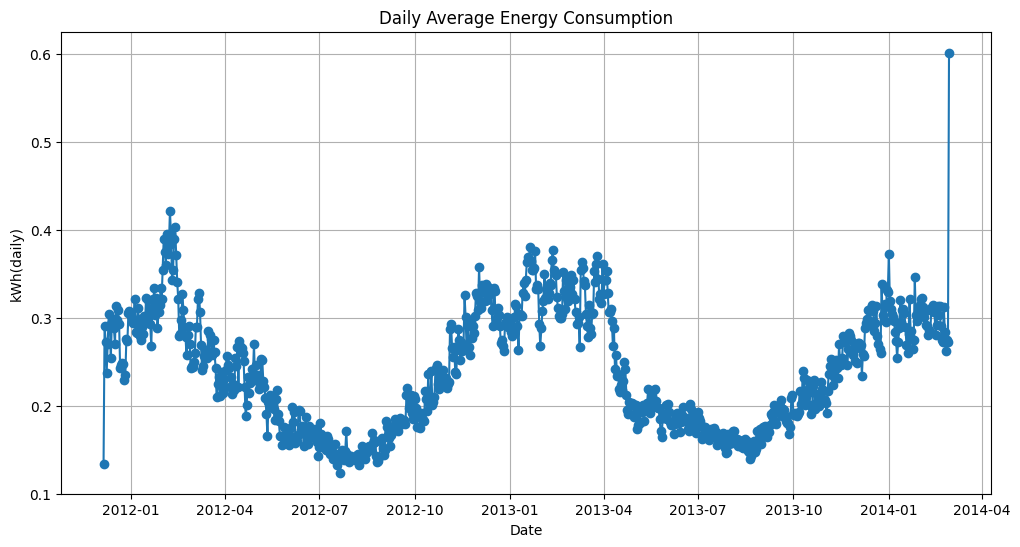

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DateTime'], daily_data['KWH/hh'], marker='o', linestyle='-')
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('kWh(daily)')
plt.grid(True)
plt.show()

In [14]:
print(daily_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  816 non-null    object 
 1   KWH/hh    816 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.9+ KB
None


##Calling weather data.

In [15]:
file_path = '/content/drive/My Drive/weather-data.csv'

# Read the CSV file into a DataFrame
weatherdf = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(weatherdf.head())

         time  weather_code (wmo code)  temperature_2m_max (°C)  \
0  01/11/2011                       51                     15.0   
1  02/11/2011                       51                     14.2   
2  03/11/2011                       53                     15.6   
3  04/11/2011                       61                     14.9   
4  05/11/2011                       51                     13.9   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                      8.9                      13.1   
1                      8.4                      11.4   
2                     12.9                      14.6   
3                     11.1                      12.7   
4                      8.6                      11.4   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           13.2                            7.1   
1                           12.1                            6.0   
2                           13.7                           

In [16]:
# Convert the time column to datetime format.
weatherdf['time'] = pd.to_datetime(weatherdf['time'], dayfirst=True)

# Display the DataFrame to verify the conversion
print(weatherdf.head())

        time  weather_code (wmo code)  temperature_2m_max (°C)  \
0 2011-11-01                       51                     15.0   
1 2011-11-02                       51                     14.2   
2 2011-11-03                       53                     15.6   
3 2011-11-04                       61                     14.9   
4 2011-11-05                       51                     13.9   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                      8.9                      13.1   
1                      8.4                      11.4   
2                     12.9                      14.6   
3                     11.1                      12.7   
4                      8.6                      11.4   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           13.2                            7.1   
1                           12.1                            6.0   
2                           13.7                           11.9  

In [17]:
print(weatherdf.columns)


Index(['time', 'weather_code (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'apparent_temperature_mean (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'daylight_duration (s)', 'sunshine_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'precipitation_hours (h)',
       'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)'],
      dtype='object')


## Dropping NaNs.

In [18]:
weatherdf = weatherdf[['time', 'weather_code (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'apparent_temperature_mean (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'daylight_duration (s)', 'sunshine_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'precipitation_hours (h)',
       'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)']]
weatherdf = weatherdf.dropna()

In [19]:
weatherdf.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
0,2011-11-01,51,15.0,8.9,13.1,13.2,7.1,11.3,2011-11-01T07:53,2011-11-01T17:34,34876.89,23635.93,0.9,0.9,5,18.8,205
1,2011-11-02,51,14.2,8.4,11.4,12.1,6.0,8.6,2011-11-02T07:55,2011-11-02T17:33,34662.17,24176.65,1.6,1.6,5,23.4,142
2,2011-11-03,53,15.6,12.9,14.6,13.7,11.9,12.8,2011-11-03T07:57,2011-11-03T17:31,34448.32,899.05,4.1,4.1,15,25.8,163
3,2011-11-04,61,14.9,11.1,12.7,12.8,10.2,11.4,2011-11-04T07:59,2011-11-04T17:29,34235.54,10425.34,12.8,12.8,16,19.6,177
4,2011-11-05,51,13.9,8.6,11.4,12.0,7.5,9.7,2011-11-05T08:00,2011-11-05T17:27,34024.06,6934.98,0.4,0.4,4,19.0,355
